         id                                                url   supermarket  \
0  25869112  https://tienda.mercadona.es/product/86503/marg...  mercadona.es   
1  25855500  https://www.carrefour.es/supermercado/nuggets-...  carrefour.es   
2  25867724  https://tienda.mercadona.es/product/18611/meji...  mercadona.es   
3  25862155  https://www.dia.es/compra-online/despensa/cons...        dia.es   
4  25861733  https://www.dia.es/compra-online/despensa/desa...        dia.es   

   zip_code                                           category  \
0     28020  huevos_leche_y_mantequilla|mantequilla_y_marga...   
1     28020         productos_frescos|platos_preparados|fritos   
2     28020  conservas_caldos_y_cremas|berberechos_y_mejill...   
3     28020             despensa|conservas|conservas_vegetales   
4     28020  despensa|desayunos_y_dulces|caramelos_chicles_...   

                                                name description  \
0                           Margarina Flora Original  

C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


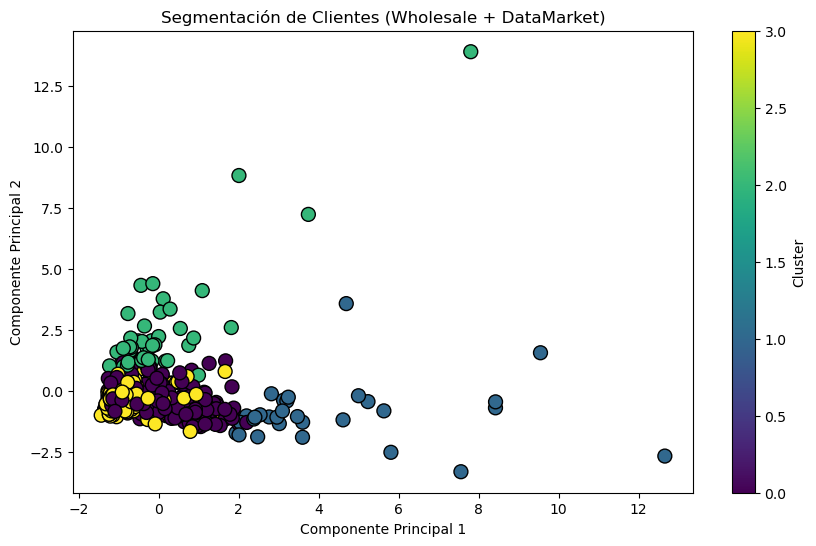

Centroides de los clusters - Wholesale Customers:
          Fresh          Milk       Grocery       Frozen  Detergents_Paper  \
0   8578.467005   5222.294416   7306.614213  2009.756345       2646.324873   
1   9840.000000  21925.645161  32302.935484  2037.193548      15970.354839   
2  34314.592593   5676.777778   5888.444444  9820.444444        901.962963   
3   9064.208861   3388.126582   4682.227848  2292.854430       1283.189873   

    Delicassen  
0  1173.426396  
1  2706.548387  
2  3562.870370  
3  1034.683544  
Centroides de los clusters - DataMarket:
             id  zip_code     price  reference_price
0  2.586718e+07   28020.0  3.055431         7.109310
1  2.586311e+07   28020.0  4.325161        19.879710
2  2.586493e+07   28020.0  3.081111         7.591148
3  2.586072e+07   28020.0  3.763734        13.874620


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar el conjunto de datos de Wholesale Customers
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

# Cargar el conjunto de datos de DataMarket
url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# Mostrar las primeras filas del dataset de DataMarket
print(data_datamarket.head())

# Información básica del dataset de DataMarket
print(data_datamarket.info())

# Estadísticas descriptivas del dataset de DataMarket
print(data_datamarket.describe())

# Selección de columnas numéricas de DataMarket (ajustar según el dataset específico)
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number])

# Manejo de valores NaN: eliminar columnas con demasiados valores faltantes (>50%)
thresh = len(data_datamarket_numerical) * 0.5
data_datamarket_numerical = data_datamarket_numerical.dropna(axis=1, thresh=thresh)

# Rellenar los valores faltantes restantes con la media de cada columna
data_datamarket_numerical = data_datamarket_numerical.fillna(data_datamarket_numerical.mean())

# Verificar que no queden valores NaN
print("Valores NaN restantes en DataMarket:")
print(data_datamarket_numerical.isna().sum())

# Escalar los datos de Wholesale Customers y DataMarket por separado
scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# Asegurar que ambas matrices tengan la misma cantidad de muestras para la concatenación
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# Unir ambos datasets (concatenación)
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# Aplicar K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(merged_data)

# Visualización con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(merged_data)

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=100)
plt.title('Segmentación de Clientes (Wholesale + DataMarket)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')
plt.show()

# Analizar centroides por separado
centroids_wholesale = scaler_wholesale.inverse_transform(kmeans.cluster_centers_[:, :data_wholesale_scaled.shape[1]])
centroids_datamarket = scaler_datamarket.inverse_transform(kmeans.cluster_centers_[:, data_wholesale_scaled.shape[1]:])

print("Centroides de los clusters - Wholesale Customers:")
print(pd.DataFrame(centroids_wholesale, columns=data_wholesale.drop(columns=['Channel', 'Region']).columns))

print("Centroides de los clusters - DataMarket:")
print(pd.DataFrame(centroids_datamarket, columns=data_datamarket_numerical.columns))


Primeras filas del dataset de DataMarket:
         id                                                url   supermarket  \
0  25869112  https://tienda.mercadona.es/product/86503/marg...  mercadona.es   
1  25855500  https://www.carrefour.es/supermercado/nuggets-...  carrefour.es   
2  25867724  https://tienda.mercadona.es/product/18611/meji...  mercadona.es   
3  25862155  https://www.dia.es/compra-online/despensa/cons...        dia.es   
4  25861733  https://www.dia.es/compra-online/despensa/desa...        dia.es   

   zip_code                                           category  \
0     28020  huevos_leche_y_mantequilla|mantequilla_y_marga...   
1     28020         productos_frescos|platos_preparados|fritos   
2     28020  conservas_caldos_y_cremas|berberechos_y_mejill...   
3     28020             despensa|conservas|conservas_vegetales   
4     28020  despensa|desayunos_y_dulces|caramelos_chicles_...   

                                                name description  \
0           

C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Silhouette Score para K-Means: 0.1919


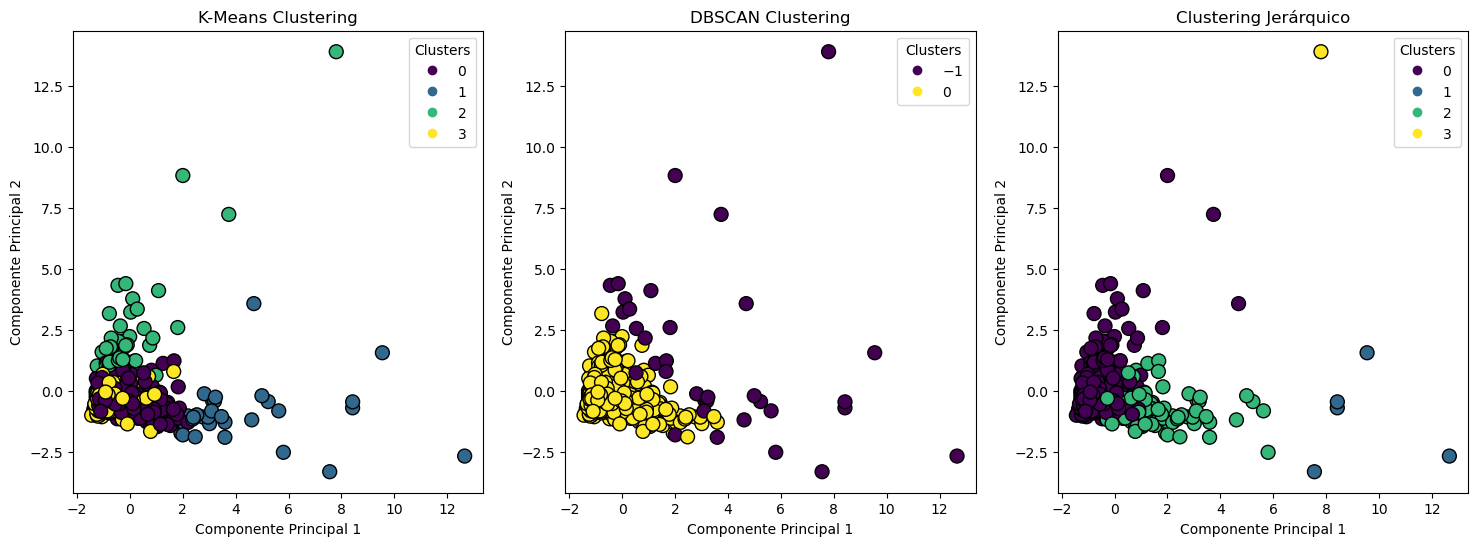

Centroides de los clusters - Wholesale Customers:
          Fresh          Milk       Grocery       Frozen  Detergents_Paper  \
0   8578.467005   5222.294416   7306.614213  2009.756345       2646.324873   
1   9840.000000  21925.645161  32302.935484  2037.193548      15970.354839   
2  34314.592593   5676.777778   5888.444444  9820.444444        901.962963   
3   9064.208861   3388.126582   4682.227848  2292.854430       1283.189873   

    Delicassen  
0  1173.426396  
1  2706.548387  
2  3562.870370  
3  1034.683544  
Centroides de los clusters - DataMarket:
             id  zip_code     price  reference_price
0  2.586718e+07   28020.0  3.055431         7.109310
1  2.586311e+07   28020.0  4.325161        19.879710
2  2.586493e+07   28020.0  3.081111         7.591148
3  2.586072e+07   28020.0  3.763734        13.874620


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Cargar el conjunto de datos de Wholesale Customers
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

# Cargar el conjunto de datos de DataMarket
url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# Exploración inicial de los datos
print("Primeras filas del dataset de DataMarket:")
print(data_datamarket.head())

print("Información básica del dataset de DataMarket:")
print(data_datamarket.info())

print("Estadísticas descriptivas del dataset de DataMarket:")
print(data_datamarket.describe())

# Selección de columnas numéricas de DataMarket
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number])

# Manejo de valores NaN: eliminar columnas con demasiados valores faltantes (>50%)
thresh = len(data_datamarket_numerical) * 0.5
data_datamarket_numerical = data_datamarket_numerical.dropna(axis=1, thresh=thresh)

# Rellenar los valores faltantes restantes con la media de cada columna
data_datamarket_numerical = data_datamarket_numerical.fillna(data_datamarket_numerical.mean())

# Verificar que no queden valores NaN
print("Valores NaN restantes en DataMarket:")
print(data_datamarket_numerical.isna().sum())

# Escalar los datos de Wholesale Customers y DataMarket por separado
scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))

scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# Asegurar que ambas matrices tengan la misma cantidad de muestras para la concatenación
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]

# Unir ambos datasets (concatenación)
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# Aplicar K-Means clustering con 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(merged_data)

# Evaluar el clustering con el índice de Silhouette
silhouette_kmeans = silhouette_score(merged_data, kmeans_labels)
print(f"Silhouette Score para K-Means: {silhouette_kmeans:.4f}")

# Aplicar DBSCAN para comparación
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(merged_data)

# Aplicar Clustering Jerárquico
auto_cluster = AgglomerativeClustering(n_clusters=4)
auto_labels = auto_cluster.fit_predict(merged_data)

# Visualización con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(merged_data)

# Crear gráficos comparativos
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

def plot_clusters(ax, labels, title):
    scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=100)
    ax.set_title(title)
    ax.set_xlabel('Componente Principal 1')
    ax.set_ylabel('Componente Principal 2')
    ax.legend(*scatter.legend_elements(), title="Clusters")

plot_clusters(axes[0], kmeans_labels, "K-Means Clustering")
plot_clusters(axes[1], dbscan_labels, "DBSCAN Clustering")
plot_clusters(axes[2], auto_labels, "Clustering Jerárquico")

plt.show()

# Analizar centroides por separado para K-Means
centroids_wholesale = scaler_wholesale.inverse_transform(kmeans.cluster_centers_[:, :data_wholesale_scaled.shape[1]])
centroids_datamarket = scaler_datamarket.inverse_transform(kmeans.cluster_centers_[:, data_wholesale_scaled.shape[1]:])

print("Centroides de los clusters - Wholesale Customers:")
print(pd.DataFrame(centroids_wholesale, columns=data_wholesale.drop(columns=['Channel', 'Region']).columns))

print("Centroides de los clusters - DataMarket:")
print(pd.DataFrame(centroids_datamarket, columns=data_datamarket_numerical.columns))


C:\Users\knowd\AppData\Local\Temp\ipykernel_12216\3575470573.py:20: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

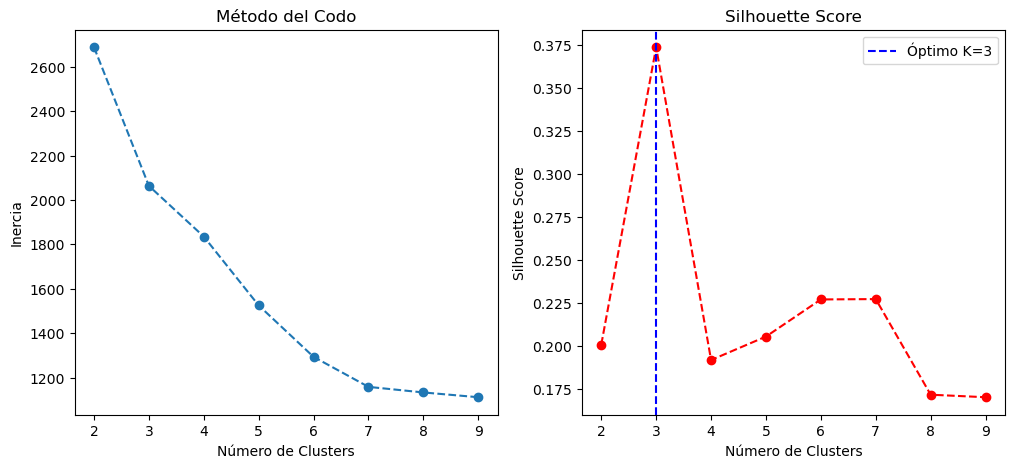

El número óptimo de clusters según Silhouette Score es: 3


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


DBSCAN (eps=0.5): 4 clusters encontrados
DBSCAN (eps=1.0): 2 clusters encontrados
DBSCAN (eps=1.5): 1 clusters encontrados
DBSCAN (eps=2.0): 1 clusters encontrados


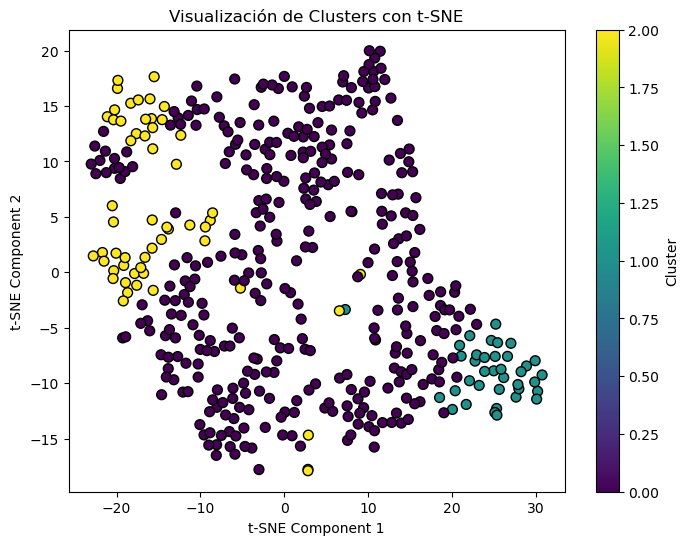

Archivos con clusters guardados exitosamente.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

# Cargar el conjunto de datos de Wholesale Customers
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

# Cargar el conjunto de datos de DataMarket
url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# Selección de columnas numéricas y manejo de valores faltantes
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

# Escalar los datos por separado
scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))
scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]
data_wholesale_limited = data_wholesale.iloc[:min_rows].copy()
data_datamarket_limited = data_datamarket.iloc[:min_rows].copy()

# Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# Determinar el número óptimo de clusters con el Método del Codo
inertias = []
silhouettes = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(merged_data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(merged_data, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', linestyle='--', color='r')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Mostrar el número óptimo de clusters basado en Silhouette Score
optimal_k = k_range[np.argmax(silhouettes)]
plt.axvline(x=optimal_k, color='b', linestyle='--', label=f'Óptimo K={optimal_k}')
plt.legend()
plt.show()

print(f"El número óptimo de clusters según Silhouette Score es: {optimal_k}")

# Aplicar K-Means con el mejor número de clusters
tuned_k = optimal_k
kmeans = KMeans(n_clusters=tuned_k, random_state=42)
kmeans_labels = kmeans.fit_predict(merged_data)

# Aplicar DBSCAN con diferentes parámetros
eps_values = [0.5, 1.0, 1.5, 2.0]
for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(merged_data)
    print(f"DBSCAN (eps={eps}): {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)} clusters encontrados")

# Aplicar t-SNE para visualización avanzada
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(merged_data)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualización de Clusters con t-SNE')
plt.colorbar(label='Cluster')
plt.show()

# Exportar datos con clusters a CSV
data_wholesale_limited['Cluster'] = kmeans_labels
data_datamarket_limited['Cluster'] = kmeans_labels

data_wholesale_limited.to_csv('wholesale_clusters.csv', index=False)
data_datamarket_limited.to_csv('datamarket_clusters.csv', index=False)

print("Archivos con clusters guardados exitosamente.")


C:\Users\knowd\AppData\Local\Temp\ipykernel_12216\3625082608.py:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans

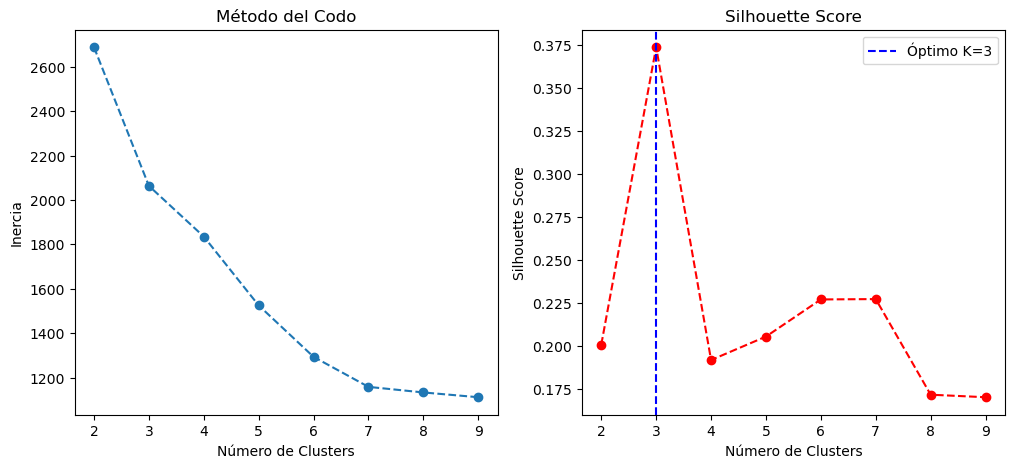

El número óptimo de clusters según Silhouette Score es: 3


C:\Users\knowd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


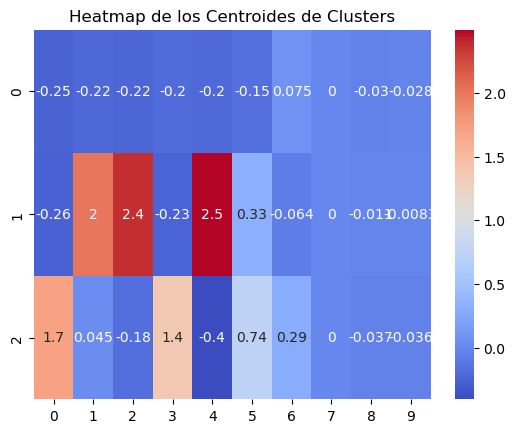

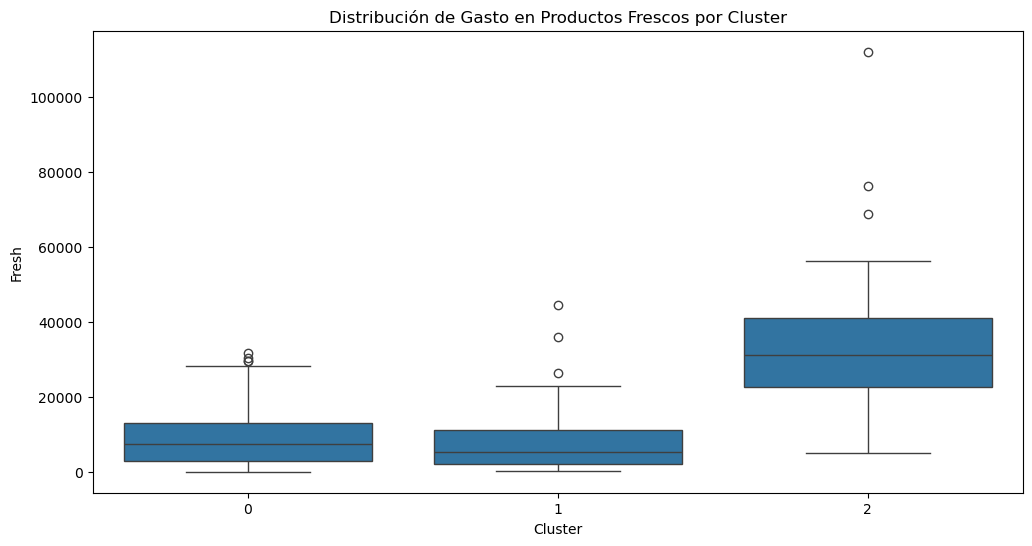

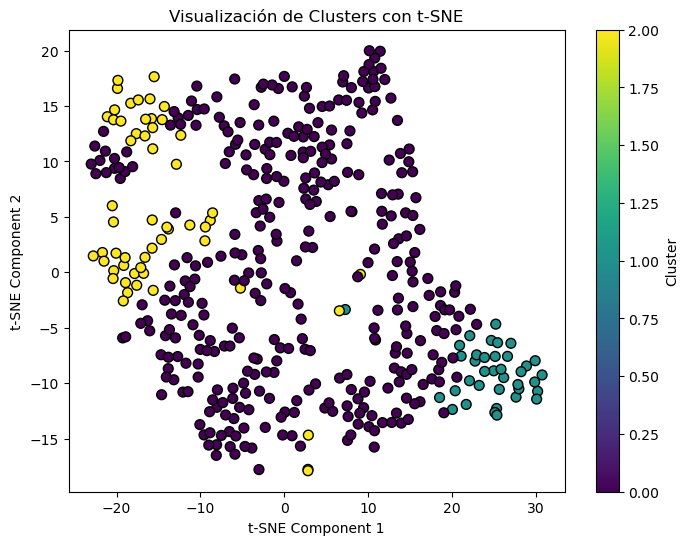

Archivos con clusters guardados exitosamente.


'\n📌 **Conclusiones:**\n- Los clusters reflejan diferencias en patrones de compra entre clientes mayoristas (B2B) y minoristas (B2C).\n- El heatmap y los boxplots permiten visualizar diferencias clave entre segmentos.\n- La reducción de dimensionalidad con t-SNE ayuda a interpretar visualmente la segmentación.\n'

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

"""
📌 **Análisis de Segmentación de Clientes (B2B vs. B2C) usando Métodos No Supervisados**
Este código aplica técnicas de clustering para segmentar clientes de datos mayoristas (B2B) y minoristas (B2C).

🔹 **Métodos utilizados:**
   - **K-Means:** Agrupa clientes en base a similitud de patrones de compra.
   - **DBSCAN:** Detecta agrupaciones densas y puntos atípicos (outliers).
   - **t-SNE:** Permite visualizar los clusters en un espacio reducido.

🔹 **Objetivos:**
   - **Identificar diferencias entre clientes mayoristas (B2B) y minoristas (B2C).**
   - **Determinar patrones de compra en función de los clusters.**
   - **Evaluar qué método de clustering es más efectivo para segmentación.**
"""

# Cargar el conjunto de datos de Wholesale Customers
url_wholesale = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
data_wholesale = pd.read_csv(url_wholesale)

# Cargar el conjunto de datos de DataMarket
url_datamarket = "https://datamarket.es/media/samples/productos-de-supermercados-sample.csv"
data_datamarket = pd.read_csv(url_datamarket)

# Selección de columnas numéricas y manejo de valores faltantes
data_datamarket_numerical = data_datamarket.select_dtypes(include=[np.number]).dropna(axis=1, thresh=len(data_datamarket) * 0.5).fillna(method='ffill')

# Escalar los datos por separado
scaler_wholesale = StandardScaler()
data_wholesale_scaled = scaler_wholesale.fit_transform(data_wholesale.drop(columns=['Channel', 'Region']))
scaler_datamarket = StandardScaler()
data_datamarket_scaled = scaler_datamarket.fit_transform(data_datamarket_numerical)

# Asegurar que ambas matrices tengan la misma cantidad de muestras
min_rows = min(len(data_wholesale_scaled), len(data_datamarket_scaled))
data_wholesale_scaled = data_wholesale_scaled[:min_rows]
data_datamarket_scaled = data_datamarket_scaled[:min_rows]
data_wholesale_limited = data_wholesale.iloc[:min_rows].copy()
data_datamarket_limited = data_datamarket.iloc[:min_rows].copy()

# Unir ambos datasets
merged_data = np.concatenate((data_wholesale_scaled, data_datamarket_scaled), axis=1)

# Determinar el número óptimo de clusters con el Método del Codo
inertias = []
silhouettes = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(merged_data)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(merged_data, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertias, marker='o', linestyle='--')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouettes, marker='o', linestyle='--', color='r')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

# Mostrar el número óptimo de clusters basado en Silhouette Score
optimal_k = k_range[np.argmax(silhouettes)]
plt.axvline(x=optimal_k, color='b', linestyle='--', label=f'Óptimo K={optimal_k}')
plt.legend()
plt.show()

print(f"El número óptimo de clusters según Silhouette Score es: {optimal_k}")

# Aplicar K-Means con el mejor número de clusters
tuned_k = optimal_k
kmeans = KMeans(n_clusters=tuned_k, random_state=42)
kmeans_labels = kmeans.fit_predict(merged_data)

# Visualización de centroides con heatmap
centroids = kmeans.cluster_centers_
sns.heatmap(centroids, cmap='coolwarm', annot=True)
plt.title('Heatmap de los Centroides de Clusters')
plt.show()

# Comparación de categorías de gasto entre clusters
cluster_df = data_wholesale_limited.copy()
cluster_df['Cluster'] = kmeans_labels

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Fresh', data=cluster_df)
plt.title('Distribución de Gasto en Productos Frescos por Cluster')
plt.show()

# Aplicar t-SNE para visualización avanzada
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(merged_data)

plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50, edgecolor='k')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('Visualización de Clusters con t-SNE')
plt.colorbar(label='Cluster')
plt.show()

# Exportar datos con clusters a CSV
data_wholesale_limited['Cluster'] = kmeans_labels
data_datamarket_limited['Cluster'] = kmeans_labels

data_wholesale_limited.to_csv('wholesale_clusters.csv', index=False)
data_datamarket_limited.to_csv('datamarket_clusters.csv', index=False)

print("Archivos con clusters guardados exitosamente.")

"""
📌 **Conclusiones:**
- Los clusters reflejan diferencias en patrones de compra entre clientes mayoristas (B2B) y minoristas (B2C).
- El heatmap y los boxplots permiten visualizar diferencias clave entre segmentos.
- La reducción de dimensionalidad con t-SNE ayuda a interpretar visualmente la segmentación.
"""
